In [1]:
!pip install pydotplus

     |████████████████████████████████| 278 kB 1.3 MB/s 
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=b11ea429b681026e16b659209ae2070f38c2393aabb82425dc9069364744d45d
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from sklearn import datasets
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
x = pd.DataFrame(iris.data[:,:], columns = iris.feature_names[:])
y = y = pd.DataFrame(iris.target,columns=['Species'])

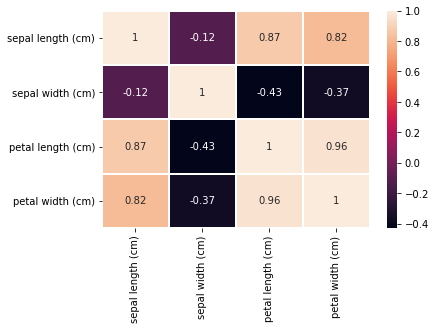

In [5]:
sns.heatmap(df.corr(),annot=True,linewidth = 0.9)
plt.show()

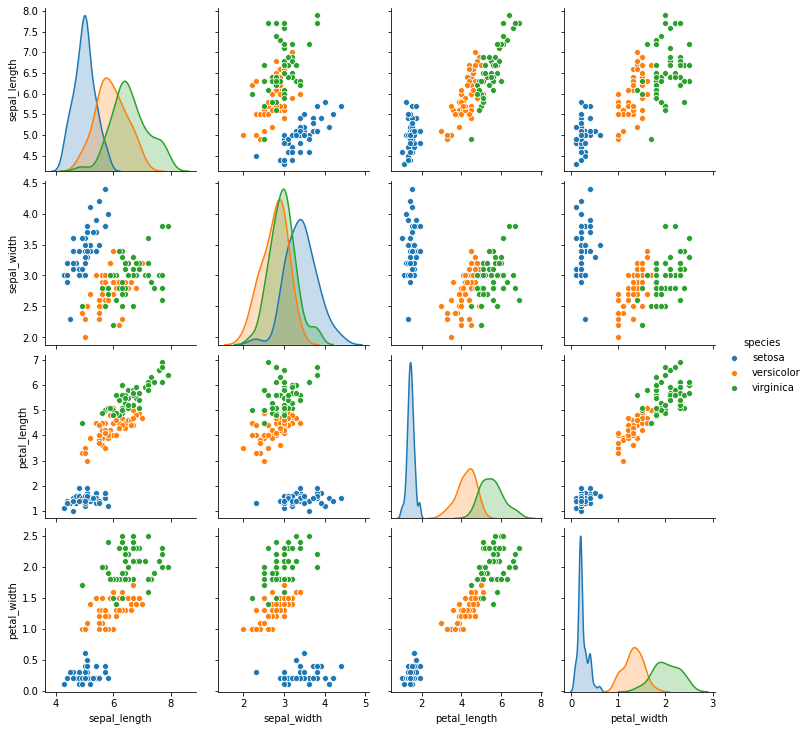

In [6]:
sns.pairplot(sns.load_dataset('iris'),hue='species')

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=12)

In [9]:
model = DecisionTreeClassifier()

In [10]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [11]:
pred = model.predict(x_test)

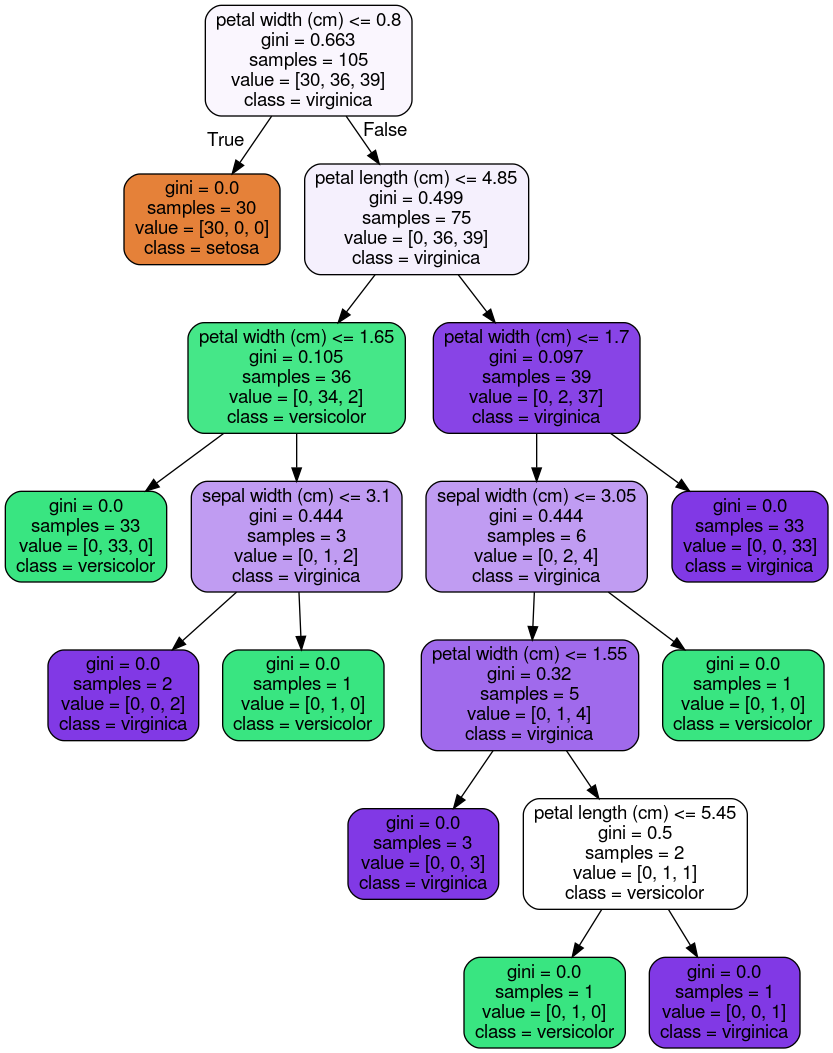

In [12]:
export_graphviz(model,
            out_file =  "tree.dot",
            feature_names = list(x.columns),
            class_names = iris.target_names,
            filled = True,
            rounded = True)
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [13]:
accuracy_score(y_test,pred)

0.9555555555555556

In [14]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.86      0.92        14
           2       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

